This program is designed to collect the MRMS data needed for the stats project

In [7]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import datetime
import imageio as img
import os

In [17]:
#Function that assigns the window to pull the data from as a function of time
def frames(dtime):
    if dtime < datetime.datetime(2019, 4, 4, 1, 54, 0):
        nw_lat = 34.75
        nw_lon = -101.09
        se_lat = 34.16
        se_lon = -98.62
    elif dtime > datetime.datetime(2019, 4, 4, 1, 54, 0):
        nw_lat = 35.11
        nw_lon = -98.95
        se_lat = 34.19
        se_lon = -97.40
        
    return nw_lat,nw_lon,se_lat,se_lon

In [18]:
#Variables
input_source = '/localdata/Stats_Project/20190403/MESH/'
output_source = '/localdata/Stats_Project/20190403/'

nw_lat = 0
nw_lon = 0
se_lat = 0
se_lon = 0

In [19]:
var_output = np.empty([0])
times = np.empty([0])

for MRMS_file in os.listdir(input_source):
    nc_file = nc.Dataset(input_source+MRMS_file, 'r')
    var = nc_file.variables['MESH'][:,:]
    u_lat = nc_file.Latitude #Upper-most latitude
    l_lon = nc_file.Longitude #Left-most longitude
    
    #Creating the arrays for the lat and lon coordinates
    y = len(var[:,0])
    x = len(var[0,:])
    lat = np.arange(u_lat, u_lat-(y*0.01),-0.01) #Going from upper to lower
    lon = np.arange(l_lon, l_lon+(x*0.01),0.01) #Going from left to right

    dtime = datetime.datetime.utcfromtimestamp(nc_file.Time)
    times = np.append(times,dtime)
    nw_lat,nw_lon,se_lat,se_lon = frames(dtime)
    lat_locs = np.where((lat >= se_lat) & (lat <= nw_lat))[0]
    lon_locs = np.where((lon >= nw_lon) & (lon <= se_lon))[0]
    
    var_cut = var[lat_locs,:]
    var_cut = var_cut[:,lon_locs]
    if np.nanmax(var_cut) < -1000:
        var_max = 0
    else:
        var_max = np.nanmax(var_cut)
        
    var_output = np.append(var_output,var_max)


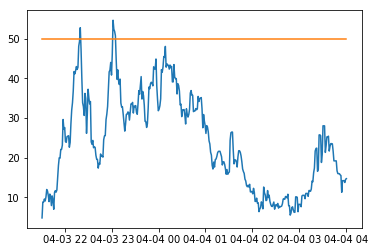

In [20]:
thing = np.ones(len(var_output))*50
plt.plot(times,var_output)
plt.plot(times,thing)
plt.show()

In [21]:
print (var_output.shape)

(391,)


In [23]:
np.savetxt(output_source+'MESH_MAX.txt',var_output)

In [24]:
threshold_locs = np.where(var_output > 50)[0]
threshold_times = times[threshold_locs]
#print (threshold_times)
print (threshold_locs)
print (var_output[threshold_locs])

[49 91 92 93 94]
[52.81561279 54.692276   52.41680908 51.88566971 50.79472351]


In [7]:
print (times)

[datetime.datetime(2018, 5, 1, 22, 0, 1)
 datetime.datetime(2018, 5, 1, 22, 1, 1)
 datetime.datetime(2018, 5, 1, 22, 2, 1)
 datetime.datetime(2018, 5, 1, 22, 3, 1)
 datetime.datetime(2018, 5, 1, 22, 4, 1)
 datetime.datetime(2018, 5, 1, 22, 5, 1)
 datetime.datetime(2018, 5, 1, 22, 6, 1)
 datetime.datetime(2018, 5, 1, 22, 7, 1)
 datetime.datetime(2018, 5, 1, 22, 8, 1)
 datetime.datetime(2018, 5, 1, 22, 9, 1)
 datetime.datetime(2018, 5, 1, 22, 10, 1)
 datetime.datetime(2018, 5, 1, 22, 11, 1)
 datetime.datetime(2018, 5, 1, 22, 12, 1)
 datetime.datetime(2018, 5, 1, 22, 13, 1)
 datetime.datetime(2018, 5, 1, 22, 14, 1)
 datetime.datetime(2018, 5, 1, 22, 15, 1)
 datetime.datetime(2018, 5, 1, 22, 16, 1)
 datetime.datetime(2018, 5, 1, 22, 17, 1)
 datetime.datetime(2018, 5, 1, 22, 18, 1)
 datetime.datetime(2018, 5, 1, 22, 19, 1)
 datetime.datetime(2018, 5, 1, 22, 20, 1)
 datetime.datetime(2018, 5, 1, 22, 21, 1)
 datetime.datetime(2018, 5, 1, 22, 22, 1)
 datetime.datetime(2018, 5, 1, 22, 23, 1)
 d

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)